**Task 1 Supervised Learning - Linear Regression**

**To Do:**
* Predict the percentage of an student based on the no. of study hours.
* This is a simple linear regression task as it involves just 2 variables.
* You can use R, Python, SAS Enterprise Miner or any other tool
* What will be predicted score if a student studies for 9.25 hrs/ day?

________________________________________________________________________________

**Project by Kiarah Patel**

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

#sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [ ]:
data = pd.read_csv('/content/Task1-Dataset.csv')

In [ ]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
data.shape

(25, 2)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


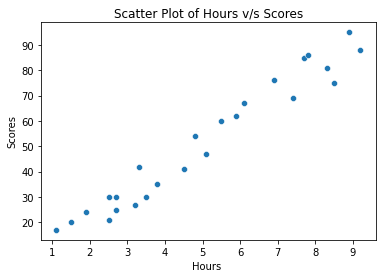

In [ ]:
plt.title("Scatter Plot of Hours v/s Scores")
sns.scatterplot(data=data, x='Hours ',y='Scores')
plt.show()

In [ ]:
X = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [ ]:
regr = LinearRegression().fit(X_train, y_train)


In [ ]:
print('Intercept    : ', regr.intercept_)
# The coefficients
print('Coefficients : ', regr.coef_[0])

Intercept    :  2.826892353899737
Coefficients :  9.682078154455697


In [ ]:
l = regr.coef_*X+regr.intercept_


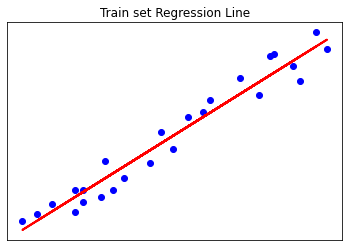

In [ ]:
plt.title("Train set Regression Line")
plt.scatter(X, y,  color='blue')
plt.plot(X, l, color='red', linewidth=2)

plt.xticks(())
plt.yticks(())

plt.show()

**Predictions**


In [ ]:
y_pred = regr.predict(X_test)
predictions = pd.DataFrame({'Hours':X_test.flatten(),'Actual_Score':y_test,'Predicted_Score':y_pred}) 
predictions

,Hours,Actual_Score,Predicted_Score
0,8.3,81,83.188141
1,2.5,30,27.032088
2,2.5,21,27.032088
3,6.9,76,69.633232
4,5.9,62,59.951153


**Evaluating Model**


In [ ]:
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(X_test,y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(X_test, y_pred))

Mean squared error: 2733.77
Coefficient of determination: -494.82


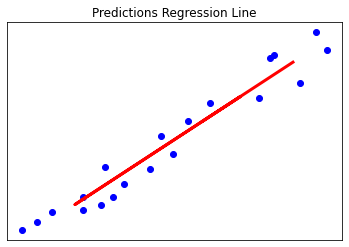

In [ ]:
plt.title("Predictions Regression Line")
plt.scatter(X_train, y_train,  color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

**Prediction for the Task**


In [ ]:
value = np.array(9.25)
pred = regr.predict(value.reshape(-1,1))
print('If you spend {} hrs/day then you will get your score = {}'.format(value,pred[0]))

If you spend 9.25 hrs/day then you will get your score = 92.38611528261494
